# Data Cleaning and Preperation Methods

In [1]:
import scipy.stats as stats
import pylab
import numpy as np
import pandas as pd
import statsmodels.api as sm
import mplfinance as fplt
import math
from matplotlib import pyplot as plt
import scipy

In [2]:
def FD_histogram(df, field='close'):
    
    q1 = df[field].quantile(.75)
    q2 = df[field].quantile(.25)
    n = len(df[field])
    bin_width = 2*(q1 - q2)*(n**(-1/3))
    num_of_bins = math.floor((df[field].max()-df[field].min())/bin_width)
   
    return df[field].hist(bins=num_of_bins)

def get_log_return(df):
    log_returns = pd.Series(np.log((df['close'] - df['open'])/df['open'] + 1),name='log returns')
    return pd.concat([df,log_returns], axis=1)

def qq_plot(df,field='close'):
    sm.qqplot(np.array(df[field]),
          loc = df[field].mean(), scale = df[field].std(), 
          line='45')
    pylab.show()
    
def auto_corr(df,field='close'):
    plt.acorr(np.array(df[field][~np.isnan(df[field])]),maxlags=10)
    plt.title('Autocorrelation of stock ' + field + ' data')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')

In [3]:
AAPL_timeindex = pd.read_csv("/Users/michael/Documents/Stony Brook/AMS 691 Fall 2020/Lecture005/AAPL_cleaned.csv")

In [4]:
AAPL_timeindex.head()

,Date_Time,Symbol,Trade Volume,Trade Price,Sale Condition,Trade Correction Indicator
0,1900-01-01 09:30:00.036753311,AAPL,20,204.39,@ I,0
1,1900-01-01 09:30:00.079162915,AAPL,25,204.39,@ I,0
2,1900-01-01 09:30:00.079456147,AAPL,55,204.39,@ I,0
3,1900-01-01 09:30:00.085361166,AAPL,5,204.35,@ I,0
4,1900-01-01 09:30:00.087596718,AAPL,2,204.35,@ I,0


In [5]:
AAPL_timeindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556717 entries, 0 to 556716
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date_Time                   556717 non-null  object 
 1   Symbol                      556717 non-null  object 
 2   Trade Volume                556717 non-null  int64  
 3   Trade Price                 556717 non-null  float64
 4   Sale Condition              556717 non-null  object 
 5   Trade Correction Indicator  556717 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 25.5+ MB


In [6]:
AAPL_timeindex["Date_Time"] = pd.to_datetime(AAPL_timeindex["Date_Time"])
AAPL_timeindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556717 entries, 0 to 556716
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date_Time                   556717 non-null  datetime64[ns]
 1   Symbol                      556717 non-null  object        
 2   Trade Volume                556717 non-null  int64         
 3   Trade Price                 556717 non-null  float64       
 4   Sale Condition              556717 non-null  object        
 5   Trade Correction Indicator  556717 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 25.5+ MB


In [7]:
AAPL_timeindex = AAPL_timeindex.set_index("Date_Time")

In [8]:
AAPL_timeindex.head()

,Symbol,Trade Volume,Trade Price,Sale Condition,Trade Correction Indicator
Date_Time,,,,,
1900-01-01 09:30:00.036753311,AAPL,20,204.39,@ I,0
1900-01-01 09:30:00.079162915,AAPL,25,204.39,@ I,0
1900-01-01 09:30:00.079456147,AAPL,55,204.39,@ I,0
1900-01-01 09:30:00.085361166,AAPL,5,204.35,@ I,0
1900-01-01 09:30:00.087596718,AAPL,2,204.35,@ I,0


In [9]:
AAPL_timeindex.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 556717 entries, 1900-01-01 09:30:00.036753311 to 1900-01-01 16:15:00.006035274
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Symbol                      556717 non-null  object 
 1   Trade Volume                556717 non-null  int64  
 2   Trade Price                 556717 non-null  float64
 3   Sale Condition              556717 non-null  object 
 4   Trade Correction Indicator  556717 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 25.5+ MB


## Log Returns

In [10]:
import BarSampler as bs

In [11]:
AAPL_5Minbars_vol = bs.process_time_bars(AAPL_timeindex,frequency='5Min')
AAPL_5Minbars_vol

,open,high,low,close,Trade Volume
Date_Time,,,,,
1900-01-01 09:35:00,204.390,204.3900,201.63,203.1063,4172982
1900-01-01 09:40:00,203.080,204.3900,201.70,202.2097,1678667
1900-01-01 09:45:00,202.180,202.5718,201.48,201.7950,1965895
1900-01-01 09:50:00,201.795,202.2000,201.36,201.5200,1566717
1900-01-01 09:55:00,201.520,202.0900,201.33,201.6200,1349858
...,...,...,...,...,...
1900-01-01 16:00:00,201.400,201.8900,201.29,201.5900,1513092
1900-01-01 16:05:00,201.570,201.5900,201.57,201.5900,4547
1900-01-01 16:10:00,NaN,NaN,NaN,NaN,0


In [12]:
AAPL_5Minbars = get_log_return(AAPL_5Minbars_vol)

In [13]:
AAPL_5Minbars

,open,high,low,close,Trade Volume,log returns
Date_Time,,,,,,
1900-01-01 09:35:00,204.390,204.3900,201.63,203.1063,4172982,-0.006300
1900-01-01 09:40:00,203.080,204.3900,201.70,202.2097,1678667,-0.004295
1900-01-01 09:45:00,202.180,202.5718,201.48,201.7950,1965895,-0.001906
1900-01-01 09:50:00,201.795,202.2000,201.36,201.5200,1566717,-0.001364
1900-01-01 09:55:00,201.520,202.0900,201.33,201.6200,1349858,0.000496
...,...,...,...,...,...,...
1900-01-01 16:00:00,201.400,201.8900,201.29,201.5900,1513092,0.000943
1900-01-01 16:05:00,201.570,201.5900,201.57,201.5900,4547,0.000099
1900-01-01 16:10:00,NaN,NaN,NaN,NaN,0,NaN


In [21]:
len(AAPL_timeindex)

556717

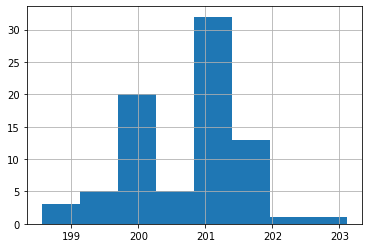

In [14]:
FD_histogram(AAPL_5Minbars)

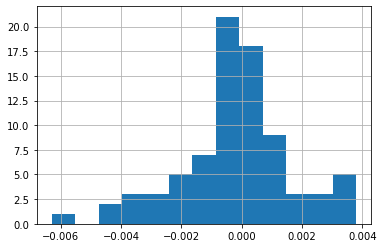

In [15]:
FD_histogram(AAPL_5Minbars,field='log returns')

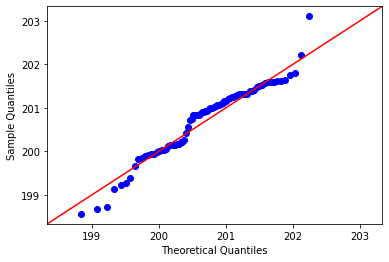

In [16]:
qq_plot(AAPL_5Minbars)

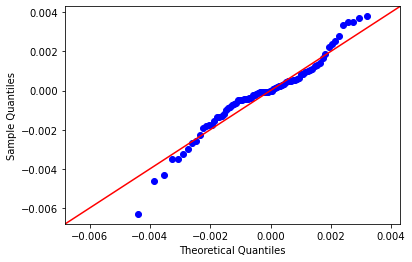

In [17]:
qq_plot(AAPL_5Minbars,field='log returns')

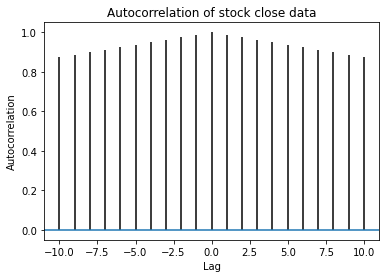

In [18]:
auto_corr(AAPL_5Minbars)

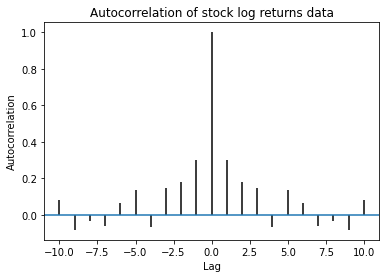

In [19]:
auto_corr(AAPL_5Minbars,field='log returns')

In [22]:
AAPL_30Secbars = bs.process_time_bars(AAPL_timeindex,frequency='30S')

In [23]:
AAPL_30Secbars = get_log_return(AAPL_30Secbars)
AAPL_30Secbars

,open,high,low,close,Trade Volume,log returns
Date_Time,,,,,,
1900-01-01 09:30:30,204.39,204.39,203.02,203.4600,991438,-0.004561
1900-01-01 09:31:00,203.45,204.39,203.13,203.2400,337024,-0.001033
1900-01-01 09:31:30,203.26,204.39,202.28,202.7097,524355,-0.002711
1900-01-01 09:32:00,202.69,204.39,202.30,202.4532,233685,-0.001169
1900-01-01 09:32:30,202.49,204.39,202.11,202.2800,373968,-0.001038
...,...,...,...,...,...,...
1900-01-01 16:13:30,NaN,NaN,NaN,NaN,0,NaN
1900-01-01 16:14:00,NaN,NaN,NaN,NaN,0,NaN
1900-01-01 16:14:30,NaN,NaN,NaN,NaN,0,NaN


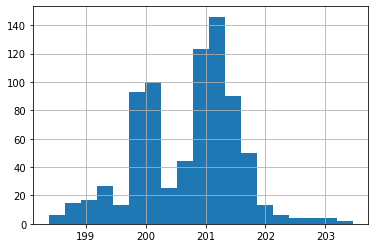

In [24]:
FD_histogram(AAPL_30Secbars)

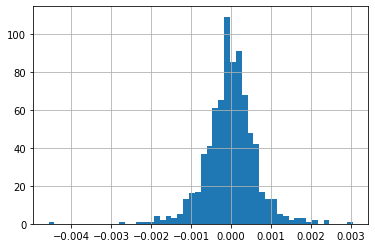

In [25]:
FD_histogram(AAPL_30Secbars,field='log returns')

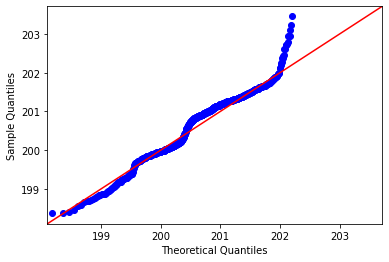

In [26]:
qq_plot(AAPL_30Secbars)

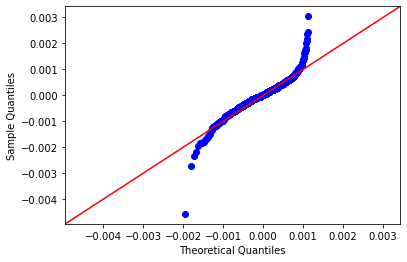

In [27]:
qq_plot(AAPL_30Secbars,field='log returns')

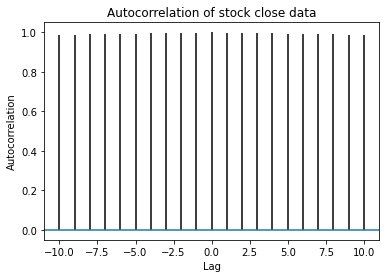

In [28]:
auto_corr(AAPL_30Secbars)

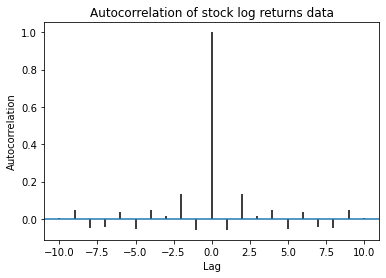

In [29]:
auto_corr(AAPL_30Secbars,field='log returns')

In [30]:
AAPL_2KTickBars = bs.process_tick_bars(AAPL_timeindex,2000)
AAPL_2KTickBars

,open,high,low,close,volume
Date_Time,,,,,
1900-01-01 09:30:02.323630103,204.3900,204.39,203.920,203.980,215460
1900-01-01 09:30:04.617693097,203.9600,204.39,203.590,203.700,157369
1900-01-01 09:30:09.881172719,203.6800,204.39,203.180,203.220,237522
1900-01-01 09:30:19.329567104,203.2300,204.39,203.020,203.390,241846
1900-01-01 09:30:38.905320890,203.3800,204.39,203.065,203.560,266270
...,...,...,...,...,...
1900-01-01 15:56:37.981100577,201.5900,201.68,201.470,201.560,204678
1900-01-01 15:57:44.633899042,201.5600,201.66,201.500,201.520,208753
1900-01-01 15:58:24.064348503,201.5200,201.56,201.310,201.350,212847


In [31]:
AAPL_2KTickBars = get_log_return(AAPL_2KTickBars)
AAPL_2KTickBars

,open,high,low,close,volume,log returns
Date_Time,,,,,,
1900-01-01 09:30:02.323630103,204.3900,204.39,203.920,203.980,215460,-0.002008
1900-01-01 09:30:04.617693097,203.9600,204.39,203.590,203.700,157369,-0.001276
1900-01-01 09:30:09.881172719,203.6800,204.39,203.180,203.220,237522,-0.002261
1900-01-01 09:30:19.329567104,203.2300,204.39,203.020,203.390,241846,0.000787
1900-01-01 09:30:38.905320890,203.3800,204.39,203.065,203.560,266270,0.000885
...,...,...,...,...,...,...
1900-01-01 15:56:37.981100577,201.5900,201.68,201.470,201.560,204678,-0.000149
1900-01-01 15:57:44.633899042,201.5600,201.66,201.500,201.520,208753,-0.000198
1900-01-01 15:58:24.064348503,201.5200,201.56,201.310,201.350,212847,-0.000844


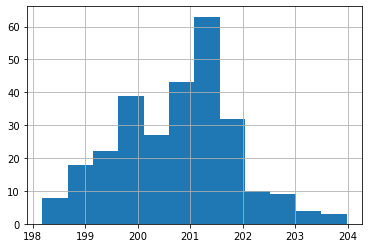

In [32]:
FD_histogram(AAPL_2KTickBars)

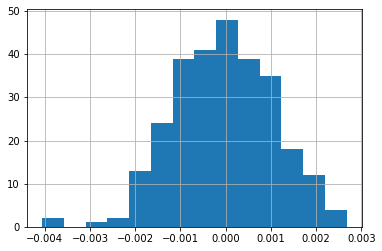

In [33]:
FD_histogram(AAPL_2KTickBars,field='log returns')

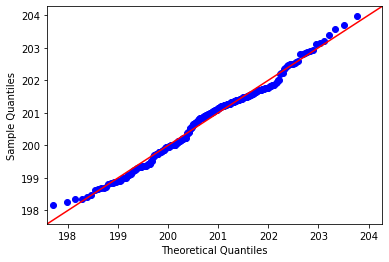

In [34]:
qq_plot(AAPL_2KTickBars)

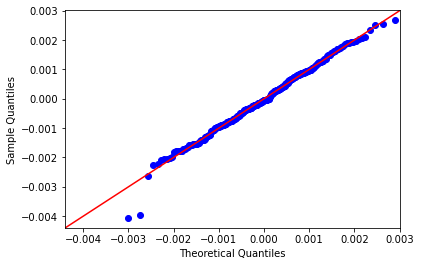

In [35]:
qq_plot(AAPL_2KTickBars,field='log returns')

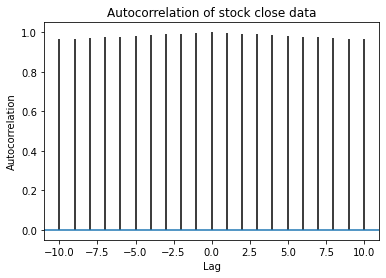

In [36]:
auto_corr(AAPL_2KTickBars)

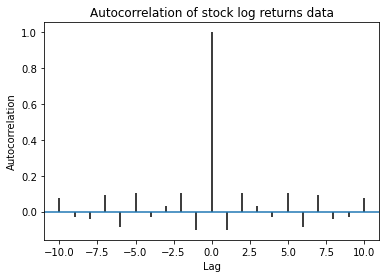

In [37]:
auto_corr(AAPL_2KTickBars,field='log returns')

In [38]:
AAPL_100Kvolbars = bs.process_volume_bars(AAPL_timeindex,100000)
AAPL_100Kvolbars.head()

,open,high,low,close,volume
Date_Time,,,,,
1900-01-01 09:30:01.164475915,204.3900,204.39,203.92,204.1700,100006.0
1900-01-01 09:30:02.137931029,204.1000,204.39,203.99,204.0000,102607.0
1900-01-01 09:30:03.417981672,204.0000,204.39,203.79,204.1700,100418.0
1900-01-01 09:30:05.548371358,203.7900,204.39,203.53,203.8701,100220.0
1900-01-01 09:30:07.196569852,203.9599,204.39,203.48,203.4800,100400.0


In [39]:
AAPL_100Kvolbars = get_log_return(AAPL_100Kvolbars)
AAPL_100Kvolbars

,open,high,low,close,volume,log returns
Date_Time,,,,,,
1900-01-01 09:30:01.164475915,204.3900,204.39,203.92,204.1700,100006.0,-0.001077
1900-01-01 09:30:02.137931029,204.1000,204.39,203.99,204.0000,102607.0,-0.000490
1900-01-01 09:30:03.417981672,204.0000,204.39,203.79,204.1700,100418.0,0.000833
1900-01-01 09:30:05.548371358,203.7900,204.39,203.53,203.8701,100220.0,0.000393
1900-01-01 09:30:07.196569852,203.9599,204.39,203.48,203.4800,100400.0,-0.002356
...,...,...,...,...,...,...
1900-01-01 15:59:12.820004377,201.4100,201.49,201.39,201.4300,100529.0,0.000099
1900-01-01 15:59:33.149158448,201.4300,201.50,201.39,201.4900,100001.0,0.000298
1900-01-01 15:59:48.220311995,201.4800,201.53,201.44,201.5300,100192.0,0.000248


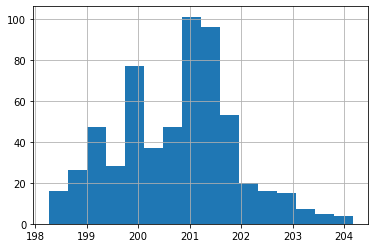

In [40]:
FD_histogram(AAPL_100Kvolbars)

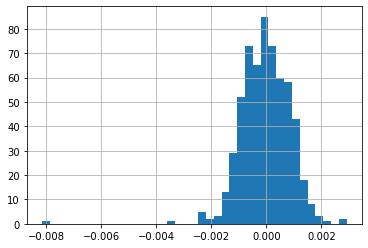

In [41]:
FD_histogram(AAPL_100Kvolbars,field='log returns')

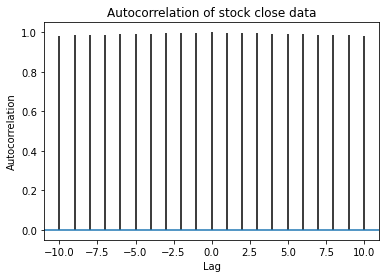

In [42]:
auto_corr(AAPL_100Kvolbars)

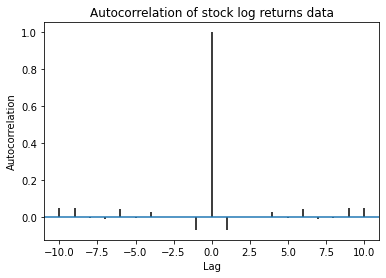

In [43]:
auto_corr(AAPL_100Kvolbars,field='log returns')

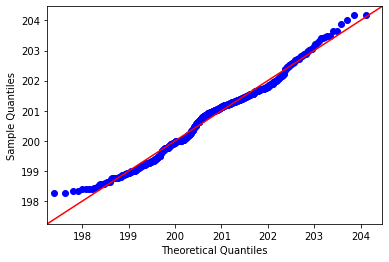

In [44]:
qq_plot(AAPL_100Kvolbars)

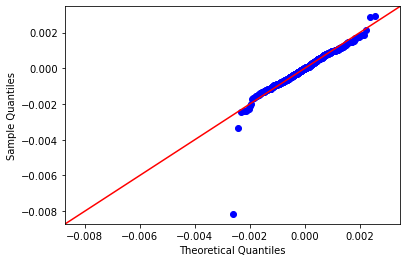

In [45]:
qq_plot(AAPL_100Kvolbars,field='log returns')

In [46]:
AAPL_100Kvolbars[AAPL_100Kvolbars['log returns'] == AAPL_100Kvolbars['log returns'].min()]

,open,high,low,close,volume,log returns
Date_Time,,,,,,
1900-01-01 11:16:16.754698901,200.63,200.77,199.0,199.0,101592.0,-0.008158


In [47]:
mask = (AAPL_timeindex.index > pd.to_datetime('1900-01-01 11:16:14.7546989')) & (AAPL_timeindex.index < pd.to_datetime('1900-01-01 11:16:16.7746989'))

In [48]:
mask

array([False, False, False, ..., False, False, False])

In [49]:
AAPL_timeindex.loc[mask]

,Symbol,Trade Volume,Trade Price,Sale Condition,Trade Correction Indicator
Date_Time,,,,,
1900-01-01 11:16:15.412926127,AAPL,50,200.6775,@ I,0
1900-01-01 11:16:15.931481264,AAPL,100,200.6600,@,0
1900-01-01 11:16:16.578688234,AAPL,1000,200.6725,@,0
1900-01-01 11:16:16.695124126,AAPL,5,200.6798,@ I,0
1900-01-01 11:16:16.754698901,AAPL,15528,199.0000,@7 V,0
1900-01-01 11:16:16.764250426,AAPL,1,200.6700,@ I,0
1900-01-01 11:16:16.774021534,AAPL,53,200.6679,@ I,0


In [50]:
AAPL_timeindex[AAPL_timeindex['Sale Condition'].str.contains('7')].sort_values(by=['Trade Volume'])

,Symbol,Trade Volume,Trade Price,Sale Condition,Trade Correction Indicator
Date_Time,,,,,
1900-01-01 11:30:44.089609245,AAPL,5,200.8300,@7 I,0
1900-01-01 12:53:56.257769886,AAPL,36,200.0556,@7 I,0
1900-01-01 12:53:55.998496410,AAPL,36,200.0556,@7 I,0
1900-01-01 12:54:26.842606951,AAPL,36,200.0000,@7 I,0
1900-01-01 12:53:33.448625679,AAPL,36,200.0556,@7 I,0
...,...,...,...,...,...
1900-01-01 15:48:53.527380677,AAPL,31000,201.1010,@7 W,0
1900-01-01 13:29:05.514574160,AAPL,33750,199.7967,@7 W,0
1900-01-01 15:35:15.808114576,AAPL,34000,201.3500,@7 W,0


In [51]:
outlier_buffer = AAPL_timeindex[~AAPL_timeindex['Sale Condition'].str.contains('7')]

In [52]:
AAPL_100Kvolbars = bs.process_volume_bars(outlier_buffer,100000)
AAPL_100Kvolbars = get_log_return(AAPL_100Kvolbars)
AAPL_100Kvolbars

,open,high,low,close,volume,log returns
Date_Time,,,,,,
1900-01-01 09:30:01.164475915,204.3900,204.39,203.92,204.1700,100006.0,-0.001077
1900-01-01 09:30:02.137931029,204.1000,204.39,203.99,204.0000,101607.0,-0.000490
1900-01-01 09:30:03.417981672,204.0000,204.39,203.79,204.1700,100418.0,0.000833
1900-01-01 09:30:05.548371358,203.7900,204.39,203.53,203.8701,100220.0,0.000393
1900-01-01 09:30:07.196569852,203.9599,204.39,203.48,203.4800,100400.0,-0.002356
...,...,...,...,...,...,...
1900-01-01 15:59:25.027841772,201.4400,201.46,201.39,201.4100,100031.0,-0.000149
1900-01-01 15:59:41.009473005,201.4100,201.50,201.39,201.4700,100210.0,0.000298
1900-01-01 15:59:55.056886555,201.4700,201.56,201.42,201.4200,100051.0,-0.000248


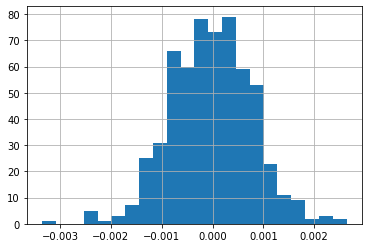

In [53]:
FD_histogram(AAPL_100Kvolbars,field='log returns')

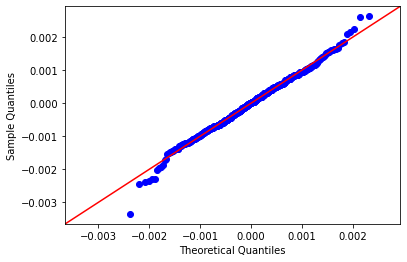

In [54]:
qq_plot(AAPL_100Kvolbars,field='log returns')

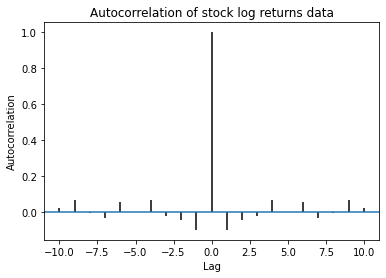

In [55]:
auto_corr(AAPL_100Kvolbars,field='log returns')

In [56]:
AAPL_100Kvolbars.agg({'log returns':['mean','median','std','skew','kurt']})

,log returns
mean,-0.000028
median,-0.000007
std,0.000801
skew,-0.075421
kurt,0.608593


In [57]:
AAPL_200Kdollarbars = bs.process_dollar_bars(AAPL_timeindex,20000000)
AAPL_200Kdollarbars.head()

,open,high,low,close,volume,dollar
Date_Time,,,,,,
1900-01-01 09:30:01.155351817,204.39,204.39,203.92,204.09,98041,2.002384e+07
1900-01-01 09:30:02.136358342,204.10,204.39,203.99,204.00,98057,2.000682e+07
1900-01-01 09:30:03.297633205,204.00,204.39,203.80,203.88,98093,2.000491e+07
1900-01-01 09:30:05.246775144,203.85,204.39,203.59,203.70,98274,2.002360e+07
1900-01-01 09:30:07.017477833,204.17,204.39,203.50,203.50,98876,2.013158e+07


In [58]:
AAPL_200Kdollarbars = get_log_return(AAPL_200Kdollarbars)

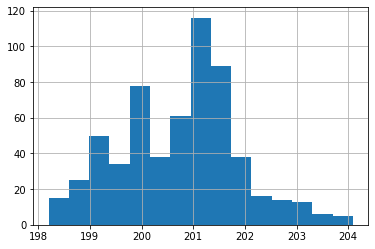

In [59]:
FD_histogram(AAPL_200Kdollarbars)

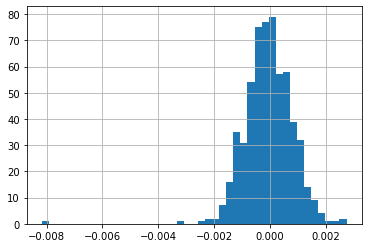

In [60]:
FD_histogram(AAPL_200Kdollarbars,field='log returns')

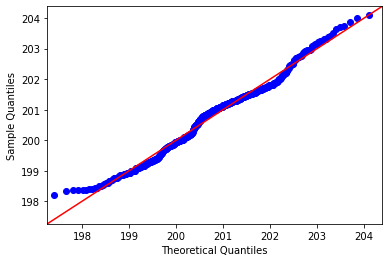

In [61]:
qq_plot(AAPL_200Kdollarbars)

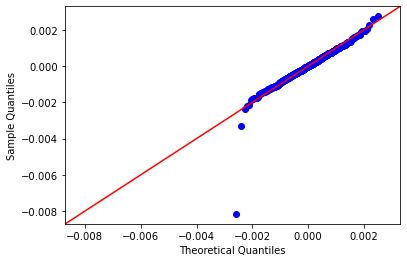

In [62]:
qq_plot(AAPL_200Kdollarbars,field='log returns')

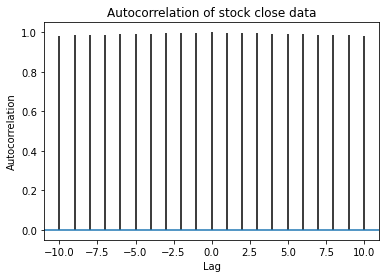

In [63]:
auto_corr(AAPL_200Kdollarbars)

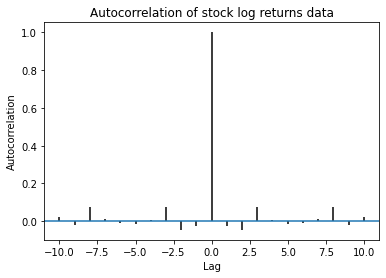

In [64]:
auto_corr(AAPL_200Kdollarbars,field='log returns')

## Information Bars

Here we are trying to sample bars based on some type of information we are interested in. Technically you could call things like volume bars a type of information bar because the information we are interested in is volume. In this section we are more interested in less standard types of information. Typically this information is used to do some kind of exploratory data analysis. I what we do below we will typically consider a sequence 
$$\{(p_t,v_t)\}_{t = 1, \ldots T}$$
of price volume pairs at tick $t$. Much of the information in the market, especially on the microstructure level, depends heavily on price and volume. The trick is to use them in clever ways to uncover signals. 

### Tick Information Bars

These can come in various forms. Whatever the form the information we are searching for arrives at the tick level. For example let us say we want to represent the data to indicate if a tick was a buy or a sell. Once we have established a sequence of buys and sells we can ask many questions. One is when do we see the typical buy/sell pattern go out of balance. This can shed light on supply demand issues that drive price action. To this end we define the buy/sell indicator as follows
$$b_t = \left\{
\begin{array}{ll}
      b_{t-1} &  \Delta p_t = 0 \\
      \frac{|\Delta p_t|}{ \Delta p_t} &  \Delta p_t \neq 0 \\
\end{array} 
\right.$$
We can initialize this by setting $b_0 = b_T$. One common practice is to leave the first few trades unclassified. This can be done on the individual tick level or across a number of ticks. 

In [65]:
AAPL_timeindex

,Symbol,Trade Volume,Trade Price,Sale Condition,Trade Correction Indicator
Date_Time,,,,,
1900-01-01 09:30:00.036753311,AAPL,20,204.39,@ I,0
1900-01-01 09:30:00.079162915,AAPL,25,204.39,@ I,0
1900-01-01 09:30:00.079456147,AAPL,55,204.39,@ I,0
1900-01-01 09:30:00.085361166,AAPL,5,204.35,@ I,0
1900-01-01 09:30:00.087596718,AAPL,2,204.35,@ I,0
...,...,...,...,...,...
1900-01-01 16:00:00.225387894,AAPL,2374,201.57,@ M,0
1900-01-01 16:00:00.246734134,AAPL,80,201.57,@F I,0
1900-01-01 16:00:00.248124769,AAPL,120,201.57,@F,0


In [66]:
AAPL_2KTickBars

,open,high,low,close,volume,log returns
Date_Time,,,,,,
1900-01-01 09:30:02.323630103,204.3900,204.39,203.920,203.980,215460,-0.002008
1900-01-01 09:30:04.617693097,203.9600,204.39,203.590,203.700,157369,-0.001276
1900-01-01 09:30:09.881172719,203.6800,204.39,203.180,203.220,237522,-0.002261
1900-01-01 09:30:19.329567104,203.2300,204.39,203.020,203.390,241846,0.000787
1900-01-01 09:30:38.905320890,203.3800,204.39,203.065,203.560,266270,0.000885
...,...,...,...,...,...,...
1900-01-01 15:56:37.981100577,201.5900,201.68,201.470,201.560,204678,-0.000149
1900-01-01 15:57:44.633899042,201.5600,201.66,201.500,201.520,208753,-0.000198
1900-01-01 15:58:24.064348503,201.5200,201.56,201.310,201.350,212847,-0.000844


In [67]:
np.sign(np.array(AAPL_2KTickBars['close']) - np.array(AAPL_2KTickBars['open']))

array([-1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1.,
        1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,
        1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,
        1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,
        1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  0.,  0.,  0., -1.,
       -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,
        1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1

In [68]:
np.sign(np.array(AAPL_2KTickBars['log returns']))

array([-1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1.,
        1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,
        1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,
        1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,
        1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  0.,  0.,  0., -1.,
       -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,
        1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1

In [69]:
np.sign(np.array(AAPL_2KTickBars['log returns'])).cumsum()

array([ -1.,  -2.,  -3.,  -2.,  -1.,  -2.,  -3.,  -4.,  -3.,  -4.,  -5.,
        -4.,  -5.,  -4.,  -5.,  -4.,  -3.,  -2.,  -3.,  -4.,  -5.,  -4.,
        -5.,  -6.,  -7.,  -8.,  -7.,  -8.,  -9.,  -8.,  -9., -10.,  -9.,
       -10.,  -9.,  -8.,  -9.,  -8.,  -9.,  -8.,  -9.,  -8.,  -9., -10.,
        -9.,  -8.,  -9.,  -8.,  -9.,  -8.,  -9., -10., -11., -12., -13.,
       -12., -13., -14., -15., -16., -17., -18., -17., -18., -17., -16.,
       -15., -16., -15., -16., -17., -18., -19., -20., -20., -20., -20.,
       -21., -22., -23., -22., -23., -24., -25., -26., -25., -26., -27.,
       -26., -27., -26., -25., -26., -25., -26., -27., -26., -25., -26.,
       -25., -26., -27., -28., -29., -30., -29., -28., -29., -28., -29.,
       -28., -27., -28., -27., -28., -29., -30., -29., -28., -27., -28.,
       -27., -28., -29., -28., -29., -30., -31., -30., -29., -28., -27.,
       -26., -27., -26., -25., -24., -23., -22., -21., -20., -19., -18.,
       -17., -16., -17., -16., -17., -18., -19., -1

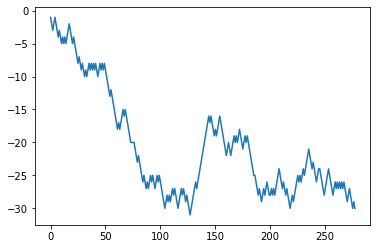

In [70]:
plt.plot(np.sign(np.array(AAPL_2KTickBars['log returns'])).cumsum())

Text(0, 0.5, 'Autocorrelation')

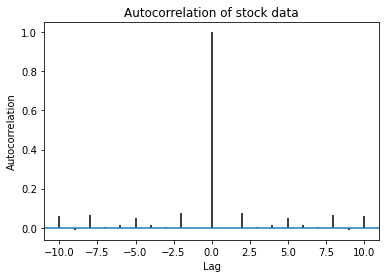

In [71]:
plt.acorr(np.sign(np.array(AAPL_2KTickBars['log returns'])),maxlags=10)
plt.title('Autocorrelation of stock data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

### Runs

In [72]:
trade_sign = (np.sign(np.array(AAPL_timeindex['Trade Price'])[1:-1] - np.array(AAPL_timeindex['Trade Price'])[0:-2]))

In [73]:
trade_sign = trade_sign.tolist()
trade_sign.insert(0,0.0)
trade_sign.insert(-1,0.0)

In [74]:
len(trade_sign)

556717

In [75]:
len(AAPL_timeindex['Trade Price'])

556717

In [76]:
AAPL_timeindex['Trade Sign'] = trade_sign

In [77]:
AAPL_timeindex[20:40]

,Symbol,Trade Volume,Trade Price,Sale Condition,Trade Correction Indicator,Trade Sign
Date_Time,,,,,,
1900-01-01 09:30:00.090761111,AAPL,100,204.2625,@,0,1.0
1900-01-01 09:30:00.092600469,AAPL,7,204.2600,@ I,0,-1.0
1900-01-01 09:30:00.092610118,AAPL,471,204.2600,@,0,0.0
1900-01-01 09:30:00.092621195,AAPL,316,204.2600,@,0,0.0
1900-01-01 09:30:00.093299904,AAPL,10,204.2600,@ I,0,0.0
1900-01-01 09:30:00.159286235,AAPL,14,204.3200,@ I,0,1.0
1900-01-01 09:30:00.165766696,AAPL,900,204.3200,@,0,0.0
1900-01-01 09:30:00.198756144,AAPL,10,204.3800,@ I,0,1.0
1900-01-01 09:30:00.228130550,AAPL,19,204.3100,@F I,0,-1.0


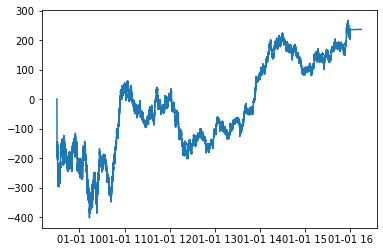

In [78]:
plt.plot(AAPL_timeindex['Trade Sign'].cumsum())

In [79]:
AAPL_timeindex.iloc[4]

Symbol                          AAPL
Trade Volume                       2
Trade Price                   204.35
Sale Condition                  @  I
Trade Correction Indicator         0
Trade Sign                         0
Name: 1900-01-01 09:30:00.087596718, dtype: object

In [80]:
def process_run_bars(df):
   
    buffer = []
    
    for i in range(len(df)):
        
        price = df['Trade Price'].iloc[i]
        volume = df['Trade Volume'].iloc[i]
        index = df.index.values[i]
        
        if df['Trade Sign'].iloc[i] != 0:
            buffer.append({
                'Date_Time':index,
                'Trade Price':price,
                'Trade Volume':volume
            })
            
    buffer = pd.DataFrame(buffer).set_index('Date_Time')
    return buffer

In [81]:
AAPL_PriceActionBars = process_run_bars(AAPL_timeindex)

In [82]:
AAPL_PriceActionBars

,Trade Price,Trade Volume
Date_Time,,
1900-01-01 09:30:00.085361166,204.35,5
1900-01-01 09:30:00.089440105,204.31,28
1900-01-01 09:30:00.089440273,204.30,65
1900-01-01 09:30:00.089464624,204.26,200
1900-01-01 09:30:00.089918275,204.30,10
...,...,...
1900-01-01 15:59:59.989959329,201.59,100
1900-01-01 15:59:59.992964359,201.56,100
1900-01-01 15:59:59.993033270,201.59,100
